In [3]:
!pip install tensorflow_datasets

  Using cached tensorflow_datasets-4.9.2-py3-none-any.whl (5.4 MB)
  Using cached array_record-0.4.0-py38-none-any.whl (3.0 MB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached tensorflow_metadata-1.14.0-py3-none-any.whl (28 kB)
  Using cached dm_tree-0.1.8-cp38-cp38-win_amd64.whl (101 kB)
  Using cached googleapis_common_protos-1.63.0-py2.py3-none-any.whl (229 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.1.0
    Uninstalling absl-py-2.1.0:
      Successfully uninstalled absl-py-2.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.12.0 which is incompatible.
-ensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.12.3 which is incompatible.
-ensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.12.0 which is incompatible.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [6]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0



In [7]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [8]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5071 - accuracy: 0.4493 - val_loss: 1.2205 - val_accuracy: 0.5584
Epoch 2/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1575 - accuracy: 0.5938 - val_loss: 1.1478 - val_accuracy: 0.5939
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9991 - accuracy: 0.6459 - val_loss: 0.9499 - val_accuracy: 0.6660
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9047 - accuracy: 0.6823 - val_loss: 1.0443 - val_accuracy: 0.6340
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8322 - accuracy: 0.7072 - val_loss: 0.9263 - val_accuracy: 0.6779
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7803 - accuracy: 0.7281 - val_loss: 0.8730 - val_accuracy: 0.6962
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7281 - accuracy: 0.7439 - val_loss: 0.8662 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.8824 - accuracy: 0.7053
Test accuracy: 0.705299973487854


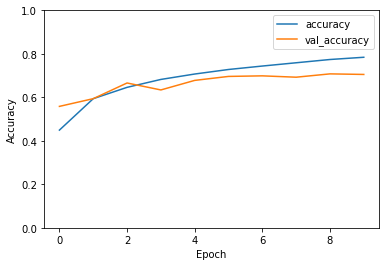

In [11]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix


In [16]:
test_predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(cm)

313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[733  14  62  13  28  13  15  10  88  24]
 [ 28 806   8   6   9   5  18   3  30  87]
 [ 45   5 525  60 153 106  71  19  12   4]
 [ 21   3  64 463  95 236  73  19  18   8]
 [ 13   1  44  41 766  53  37  34   9   2]
 [ 14   1  30 137  66 678  37  28   6   3]
 [  9   3  47  43  49  34 808   4   3   0]
 [ 18   3  29  32 100 107   8 694   3   6]
 [ 66  32  16  14  19  13   7   1 815  17]
 [ 37  70  15  16  21  15  17   9  35 765]]


<AxesSubplot:>

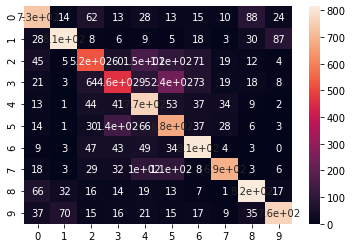

In [18]:
import seaborn as sns
sns.heatmap(cm,annot=True)